In [9]:
#import dependencies
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#postgres password
from keys import pw

#engine parameters
dialect_driver = "postgresql"
user = "postgres"
host = "localhost"
port = 5432
default_db = "sql-challenge"

In [2]:
#setting up the dataframe
df = pd.DataFrame({"emp_no":[], "first_name":[], "last_name":[], "title":[], "salary":[]})

emp_series, first_series, last_series, title_series, salary_series = [], [], [], [], []

In [3]:
#creating the engine
engine = create_engine(f"{dialect_driver}://{user}:{pw}@{host}:{port}/{default_db}")

In [4]:
#query string
sql_query = """
            SELECT e.emp_no, e.first_name, e.last_name, t.title, s.salary
            FROM employees e
            LEFT JOIN salaries s
                ON e.emp_no = s.emp_no
            LEFT JOIN titles t
                ON e.emp_title = t.title_id;
            """

In [5]:
#accessing database and making lists to add to our dataframe
try:
    connection = engine.connect()
    results = connection.execute(sql_query)
    for row in results:
        emp_series.append(row.emp_no)
        first_series.append(row.first_name)
        last_series.append(row.last_name)
        title_series.append(row.title)
        salary_series.append(row.salary)
except Exception as e:
    print("Error: ", e)
finally:
    connection.close()
    engine.dispose()

In [6]:
#constructing our dataframe
df["emp_no"] = emp_series
df["first_name"] = first_series
df["last_name"] = last_series
df["title"] = title_series
df["salary"] = salary_series

In [8]:
df

,emp_no,first_name,last_name,title,salary
0,57444,Berry,Babb,Engineer,48973
1,263976,Eran,Cusworth,Senior Engineer,40000
2,461591,Xudong,Samarati,Senior Staff,40000
3,477657,Lihong,Magliocco,Engineer,54816
4,29920,Shuichi,Tyugu,Engineer,40000
...,...,...,...,...,...
300019,81057,Patricio,Pocchiola,Senior Engineer,40000
300020,464231,Constantino,Eastman,Staff,69696
300021,76671,Ortrud,Plessier,Staff,61886
300022,264920,Percy,Samarati,Staff,62772


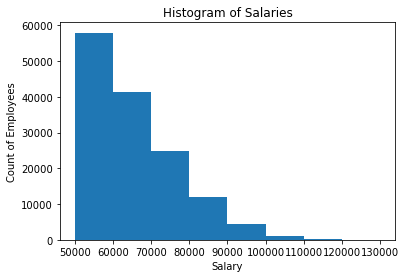

In [21]:
#histogram
bins = [49999, 59999, 69999, 79999, 89999, 99999, 109999, 119999, 129999]

plt.hist(salary_series, bins)
plt.title("Histogram of Salaries")
plt.xlabel("Salary")
plt.ylabel("Count of Employees")
plt.show()

In [41]:
#bar chart
average_df = df.groupby(df["title"], as_index = False).mean()
average_df[["title", "salary"]]

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


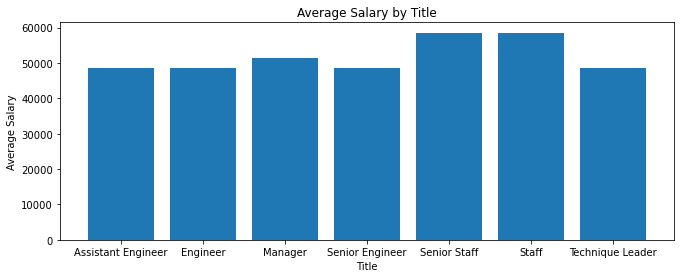

In [48]:
plt.figure(figsize = (11,4))
plt.bar(average_df["title"], average_df["salary"])
plt.xlabel("Title")
plt.ylabel("Average Salary")
plt.title("Average Salary by Title")
plt.show()